In [41]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import glob
import os
from repeats_utils import plot_salmonTE
from sequencing_tools.viz_tools import color_encoder, okabeito_palette, simpsons_palette
from plotting_utils import figure_path
from adjustText import adjust_text

plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize = 15)
plt.rc('ytick', labelsize = 15)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
TE_path = '/stor/work/Lambowitz/cdw2854/cfNA/tgirt_map/salmonTE/test*'
te_paths = glob.glob(TE_path)
res_df = map(lambda p: pd.read_csv(p + '/results.csv')\
                     .assign(samplename = os.path.basename(p)), 
             te_paths)
res_df = pd.concat(res_df) \
    .assign(log2FoldChange = lambda d: -d.log2FoldChange)
res_df.head()

,name,class,clade,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,samplename
0,ALU,Non-LTR Retrotransposon,SINE,10.175599,0.218816,0.573841,-0.381317,0.702968,0.814516,test_dnase
1,AluJb,Non-LTR Retrotransposon,SINE,28.604883,0.770579,0.259560,-2.968789,0.002990,0.027721,test_dnase
2,AluJo,Non-LTR Retrotransposon,SINE,1.954516,2.558861,0.820159,-3.119955,0.001809,0.020588,test_dnase
3,AluJr,Non-LTR Retrotransposon,SINE,2.014157,0.225349,0.549258,-0.410279,0.681601,0.799333,test_dnase
4,AluJr4,Non-LTR Retrotransposon,SINE,1.253133,-1.139480,0.589382,1.933346,0.053194,0.189281,test_dnase


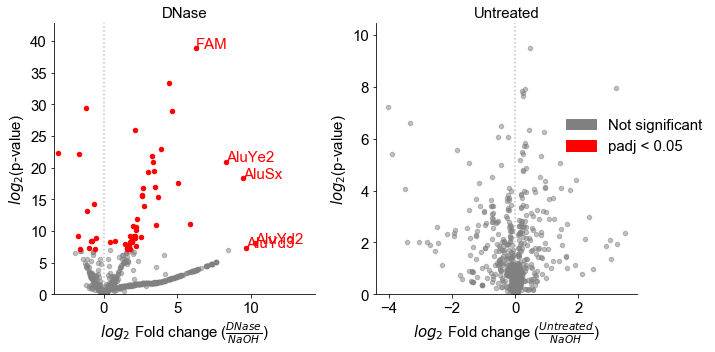

In [43]:
fig = plt.figure(figsize = (10,5))
for i, (exp, exp_df) in enumerate(res_df.groupby('samplename')):
    treatment = exp.split('_')[1].capitalize().replace('Dn','DN')
    ax = fig.add_subplot(1,2,i+1)
    texts = plot_salmonTE(exp_df, treatment, ax)
sns.despine()
pat = [mpatches.Patch(color=col, label=lab) for col, lab in zip(['gray', 'red'], ['Not significant','padj < 0.05'])]
ax.legend(handles=pat, bbox_to_anchor = (1.3, 0.7), frameon=False, fontsize=15)
fig.tight_layout()
fig.savefig(figure_path + '/salmonTE_all.pdf')

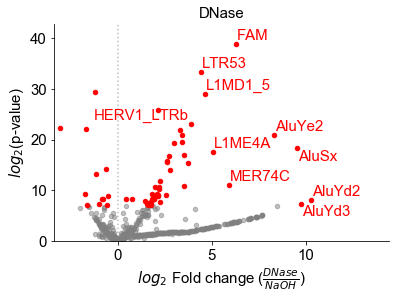

In [49]:
ax = plt.subplot()
texts = plot_salmonTE(res_df.query('samplename=="test_dnase"'), 'DNase', ax)
sns.despine()
adjust_text(texts)
plt.savefig(figure_path + '/salmonTE.pdf', bbox_inches='tight')

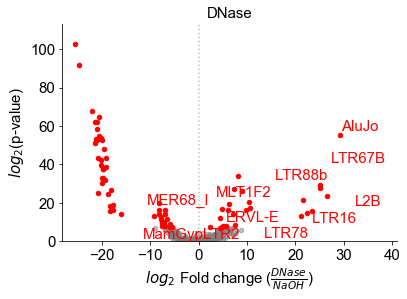

In [76]:
res_df = pd.read_table('/stor/work/Lambowitz/cdw2854/cfNA/tgirt_map/salmonTE/DE_dnase.tsv') \
    .assign(samplename= 'test_dnase') \
    .assign(name = lambda d: d.id)
ax = plt.subplot()
texts = plot_salmonTE(res_df.query('samplename=="test_dnase"'), 'DNase', ax)
sns.despine()
adjust_text(texts)
plt.savefig(figure_path + '/salmonTE.pdf', bbox_inches='tight')

In [ ]:
pd.read_table('/stor/work/Lambowitz/cdw2854/cfNA/tgirt_map/salmonTE/DE_dnase.tsv') \
    .assign(samplename= 'test_dnase') \
    .query('log2FoldChange > 0')\
    .sort_values('padj')  \
    .merge(pd.read_table('/stor/work/Lambowitz/cdw2854/src/SalmonTE/scripts/annotation_hs.tsv',
                      names = ['id','TE_type','TE_subtype']))

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,id,samplename,TE_type,TE_subtype
0,2568.859364,29.277226,3.453480,8.477601,2.298857e-17,1.563223e-15,AluJo,test_dnase,Non-LTR Retrotransposon,SINE
1,1148.706655,8.231395,1.254923,6.559282,5.406758e-11,1.225532e-09,HERV49I,test_dnase,LTR Retrotransposon,ERV1
2,185.542037,25.164523,4.164681,6.042366,1.518709e-09,2.848889e-08,LTR67B,test_dnase,LTR Retrotransposon,ERV3
3,99.197965,25.094079,4.258140,5.893201,3.787844e-09,6.868624e-08,LTR88b,test_dnase,LTR Retrotransposon,Gypsy
4,831.495604,7.357366,1.267897,5.802811,6.521244e-09,1.144373e-07,HERVKC4,test_dnase,LTR Retrotransposon,ERV2
5,1566.021490,8.921808,1.565534,5.698890,1.205899e-08,1.987906e-07,MER66_I,test_dnase,LTR Retrotransposon,ERV1
6,405.798721,26.592879,4.926941,5.397442,6.759753e-08,1.021474e-06,L2B,test_dnase,Non-LTR Retrotransposon,CR1
7,18.896231,21.546388,4.216541,5.109968,3.222133e-07,4.737407e-06,MLT1F2,test_dnase,LTR Retrotransposon,ERV3
8,207.399233,10.464669,2.122385,4.930617,8.197044e-07,1.173472e-05,MER68_I,test_dnase,LTR Retrotransposon,ERV3
9,443.108420,6.219782,1.283734,4.845069,1.265674e-06,1.721317e-05,LTR25-int,test_dnase,LTR Retrotransposon,ERV1


,id,TE_type,TE_subtype
0,ALU,Non-LTR Retrotransposon,SINE
1,AluJb,Non-LTR Retrotransposon,SINE
2,AluJo,Non-LTR Retrotransposon,SINE
3,AluJr,Non-LTR Retrotransposon,SINE
4,AluJr4,Non-LTR Retrotransposon,SINE
5,AluSc,Non-LTR Retrotransposon,SINE
6,AluSc5,Non-LTR Retrotransposon,SINE
7,AluSc8,Non-LTR Retrotransposon,SINE
8,AluSg,Non-LTR Retrotransposon,SINE
9,AluSg1,Non-LTR Retrotransposon,SINE
